# Creating k_Means clustering Model

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Loading dataset

In [2]:
data1 = pd.read_csv('../Data/small_iris.csv')

In [3]:
data1.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


### Analysing dataset

In [4]:
data1.shape

(150, 2)

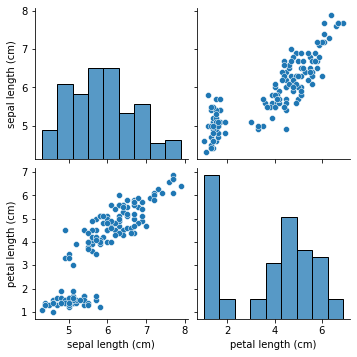

In [5]:
sns.pairplot(data1)

<AxesSubplot:>

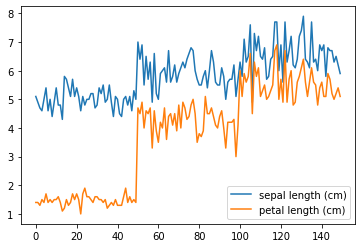

In [6]:
data1.plot()

In [88]:
data1.isnull().sum()

sepal length (cm)    0
petal length (cm)    0
dtype: int64

#### Innehåller datan konstiga värden?
> No, not the iris_small dataset.
#### Ska några attribut plockas bort?
> Not the iris_small dataset.
#### Behövs datan normaliseras?
> Not for the iris_small dataset. The two attributes are almost in the same range.

In [4]:
sLength = data1.iloc[:,0].values 
pLength = data1.iloc[:,1].values 
data = data1.values

In [33]:
# Normalizing
sLength_N = sLength / sLength.max()
pLength_N = pLength / pLength.max()
data_scaled = StandardScaler().fit_transform(data)

### K-Means clustering algorithm
#### step1) Randomly picking k datapoints as our initial Centroids
#### step2) Finding Euclidean distance between each data point and centroids
#### step3) assigning each datapoint to the closest centroid
#### step 4) Finding new centroids
#### step5) repeating in number of iterations or convergence

In [101]:

def Kmeans(Data, k, iterations):

    randx = np.random.choice(len(Data), k, replace=False)
    centroids = Data[randx, :]    ## Step1

    for it in range(iterations):
        #distances = cdist(data, centroids,'euclidean')  ## Step2
        #clusters = np.array([np.argmin(i) for i in distances]) ## Step3
        clusters = pairwise_distances_argmin(Data,centroids)  ## Step2, 3 (alternative)
        
        new_centroids = np.array([Data[clusters ==i].mean(axis=0)
                                      for  i in range(k)])    ## Step4
        
        if np.all(centroids == new_centroids):
            print('Convrged at iteration ',it)
            break                                            ## Step5
        centroids = new_centroids
            
    return centroids, clusters

   

Convrged at iteration  5


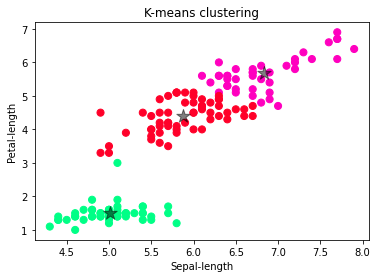

In [79]:
## testing the function and ploting the clusters

k = 3
N_iterations = 10
DATA = data
cent,clf = Kmeans(DATA,k,N_iterations) 

plt.scatter(sLength, pLength, c=clf, s=50, cmap='gist_rainbow_r')
plt.scatter(cent[:,0],cent[:,1], c='black',  marker = '*', s=200, alpha=0.5)
plt.xlabel('Sepal-length')
plt.ylabel('Petal-length')
plt.title('K-means clustering')
plt.show()

#### Using k_Means from scikitlearn for comparison to our model

Text(0.5, 1.0, 'using sklearn.KMeans')

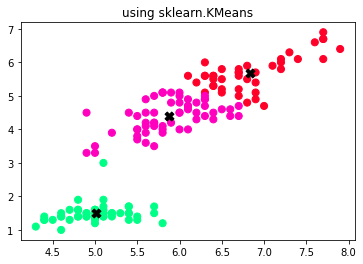

In [77]:

skmean = KMeans(init='random',n_clusters=3, n_init=10, max_iter=300, random_state=42)
skmean.fit(data)
y_pred = skmean.predict(data)
plt.scatter(sLength, pLength, c=y_pred, s=50, cmap='gist_rainbow_r')
plt.scatter(skmean.cluster_centers_[:,0], skmean.cluster_centers_[:,1], 
            marker="X", c="k", s=80)
plt.title('using sklearn.KMeans')

k= 2 iter= 10
Convrged at iteration  2
k= 2 iter= 50
Convrged at iteration  1
k= 2 iter= 100
Convrged at iteration  4
k= 3 iter= 10
Convrged at iteration  6
k= 3 iter= 50
Convrged at iteration  5
k= 3 iter= 100
Convrged at iteration  7
k= 4 iter= 10
Convrged at iteration  7
k= 4 iter= 50
Convrged at iteration  17
k= 4 iter= 100
Convrged at iteration  12


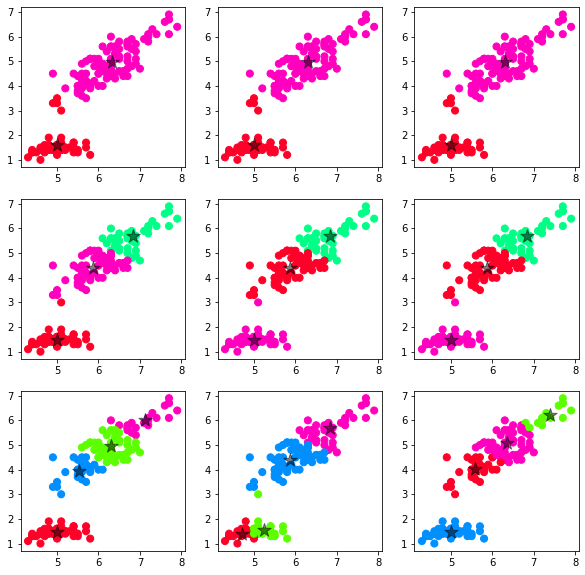

In [80]:
## testing our function with various k and iterations

ks = [2,3,4]
N_iterations = [10,50,100]

fig2, axes = plt.subplots(3,3,figsize=(10,10))
axe = axes.flatten()
m=0
for i in ks:
    for j in N_iterations:
        print('k=',i,'iter=',j)
        cent,clf = Kmeans(data,i,j) 
        axe[m].scatter(sLength, pLength, c=clf, s=50, cmap='gist_rainbow_r')
        axe[m].scatter(cent[:,0],cent[:,1], c='black',  marker = '*', s=200, alpha=0.5)  
        #axe[m].title('K=',i, ' iteration=',j)
        m = m+1
plt.show()

## VG

### Loading iris data

In [81]:
data2 = pd.read_csv('../Data/iris.csv')

In [82]:
data2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Analyzing data

In [83]:
data2.shape

(150, 4)

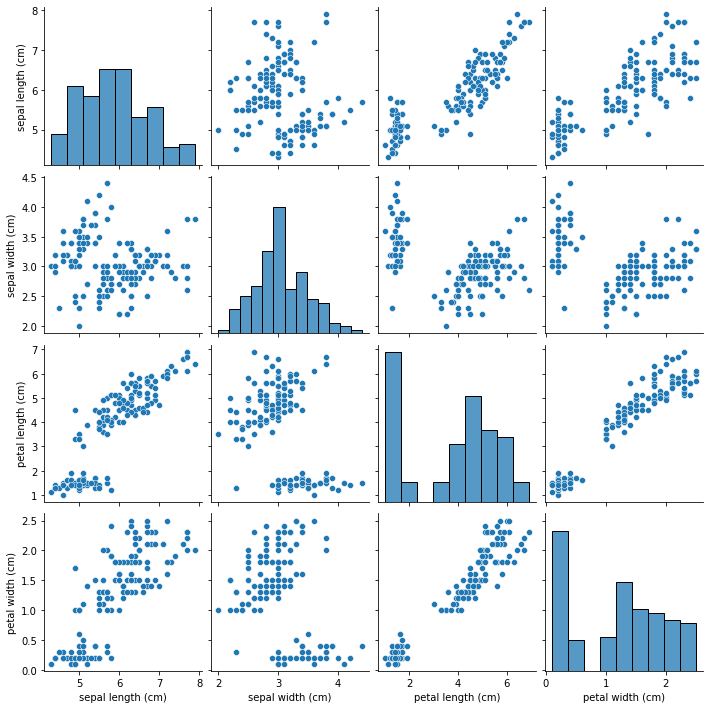

In [84]:
sns.pairplot(data2)

<AxesSubplot:>

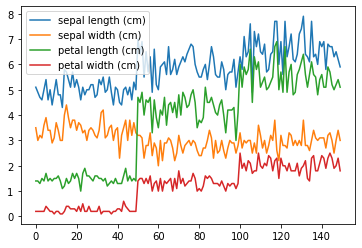

In [85]:
data2.plot()

In [87]:
data2.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### Innehåller datan konstiga värden?
> No, not the iris dataset.
#### Ska några attribut plockas bort?
> We do not remove them correctly, but we decrease the dimension of the dataset usin PCA
#### Behövs datan normaliseras?
> I did tried clustering with normalized data, but it does not changes the result meaningfully. We can say the attributes are approximately in the same range.

In [89]:
dataa = data2.values
data_scaled = StandardScaler().fit_transform(dataa)

In [102]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(dataa)
scaled_pca = pca.fit_transform(data_scaled)

Convrged at iteration  1


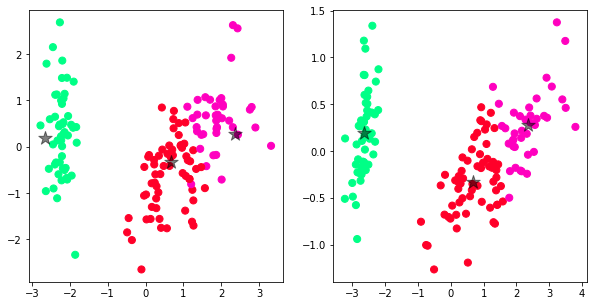

In [115]:
k = 3
N_iterations = 10
DATA1 = scaled_pca 
cent1,clf1 = Kmeans(DATA1,k,N_iterations) 

fig3, axes = plt.subplots(1,2,figsize=(10,5))
axe = axes.flatten()
## ploting scaled data
axe[0].scatter(DATA1[:,0], DATA1[:,1], c=clf, s=50, cmap='gist_rainbow_r')
axe[0].scatter(cent[:,0],cent[:,1], c='black',  marker = '*', s=200, alpha=0.5)


DATA2 = iris_pca 
cent2,clf2 = Kmeans(DATA2,k,N_iterations) 
## ploting un-scaled data
axe[1].scatter(DATA2[:,0], DATA2[:,1], c=clf, s=50, cmap='gist_rainbow_r')
axe[1].scatter(cent[:,0],cent[:,1], c='black',  marker = '*', s=200, alpha=0.5)
plt.show()

## Loading Mall data

In [117]:
data3 = pd.read_csv('../Data/Mall_Customers.csv')

In [118]:
data3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [120]:
## droping CustomerID from the dataset
data3.drop(['CustomerID'], axis=1, inplace=True)

In [122]:
data3.shape

(200, 4)

In [141]:
data3.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [125]:
## Encoding gender

from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
data3['Gender']= label.fit_transform(data3['Gender']) 


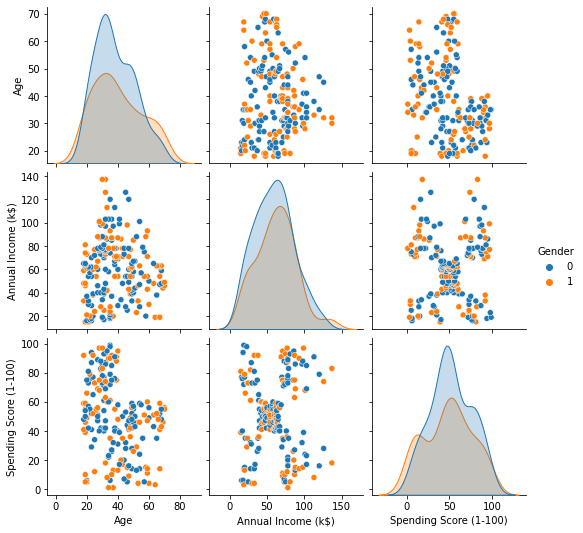

In [126]:
sns.pairplot(data3, hue='Gender')

> We see that "Gender" does not have effect on the 'Annual income' or 'spending score', so we can drop it.

In [127]:
data3.drop(['Gender'], axis=1, inplace=True)

In [128]:
data3.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [129]:
data3.shape

(200, 3)

In [132]:
Mall_small = data3.iloc[:,1:3].values

k= 3 iter= 10
k= 3 iter= 20
Convrged at iteration  4
k= 4 iter= 10
Convrged at iteration  4
k= 4 iter= 20
Convrged at iteration  7
k= 5 iter= 10
Convrged at iteration  6
k= 5 iter= 20
Convrged at iteration  5


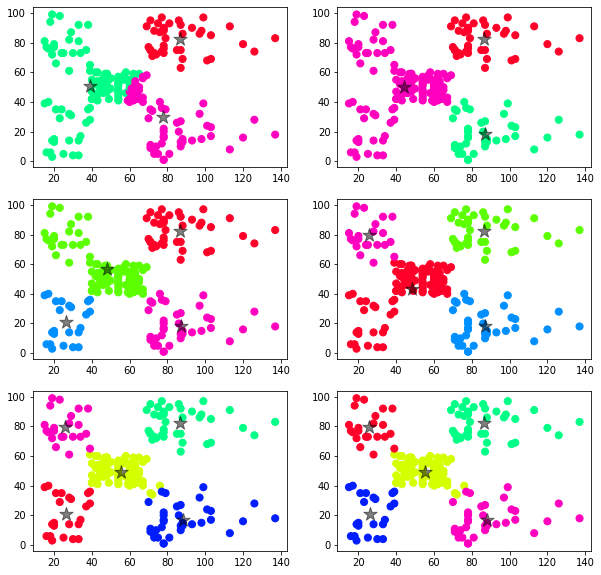

In [135]:
## Clustering with only two attributes: Annual income and Apending score

ks = [3,4,5]
N_iterations = [10,20]
DATA = Mall_small

fig2, axes = plt.subplots(3,2,figsize=(10,10))
axe = axes.flatten()
m=0
for i in ks:
    for j in N_iterations:
        print('k=',i,'iter=',j)
        cent,clf = Kmeans(DATA,i,j) 
        axe[m].scatter(DATA[:,0], DATA[:,1], c=clf, s=50, cmap='gist_rainbow_r')
        axe[m].scatter(cent[:,0],cent[:,1], c='black',  marker = '*', s=200, alpha=0.5)  
        m = m+1
plt.show()

In [137]:
Mall_scaled = StandardScaler().fit_transform(data3.values)
Mall_pca = pca.fit_transform(Mall_scaled)

k= 3 iter= 20
Convrged at iteration  10
k= 4 iter= 20
Convrged at iteration  12
k= 5 iter= 20
Convrged at iteration  12
k= 6 iter= 20
Convrged at iteration  18


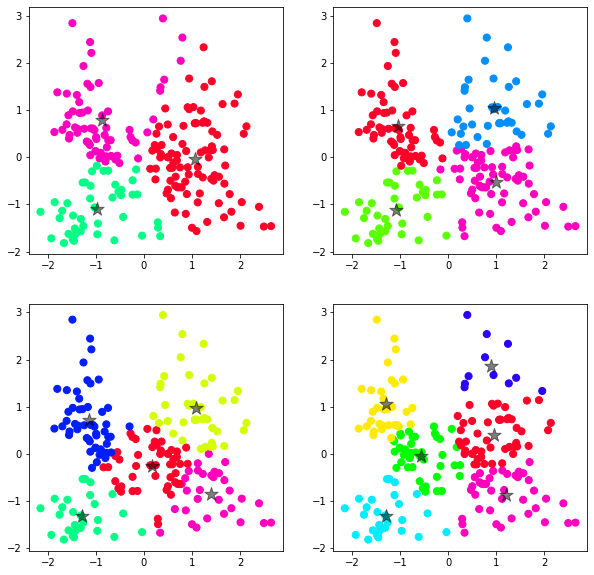

In [140]:
## Clustering with PCA_data

ks = [3,4,5,6]
N_iterations = [20]
DATA = Mall_pca

fig2, axes = plt.subplots(2,2,figsize=(10,10))
axe = axes.flatten()
m=0
for i in ks:
    for j in N_iterations:
        print('k=',i,'iter=',j)
        cent,clf = Kmeans(DATA,i,j) 
        axe[m].scatter(DATA[:,0], DATA[:,1], c=clf, s=50, cmap='gist_rainbow_r')
        axe[m].scatter(cent[:,0],cent[:,1], c='black',  marker = '*', s=200, alpha=0.5)  
        m = m+1
plt.show()

#### Innehåller datan konstiga värden?
> According to the pairplots, i do not see any strange number or outliers.
#### Ska några attribut plockas bort?
> I have rermoved "CustomerID" and "Gender", because they do not affect the clustering.
#### Behövs datan normaliseras?
> I normalized the data when I used the "age" attribute in clustering, since it is in a smaller range than the Annual income and Spending score. However, I think the resulta would not change drastically without normalization, since the variation ranges are not extremely different.

- When clasifying the Mall-customers data using only two attributes (Annual income and Spending score), number of 5 Clusters looks reasonable and clear. But adding the third attribure, Age, the classification gets a bit messy.

In [148]:
%matplotlib widget

Convrged at iteration  9


Text(0.5, 0, 'Age')

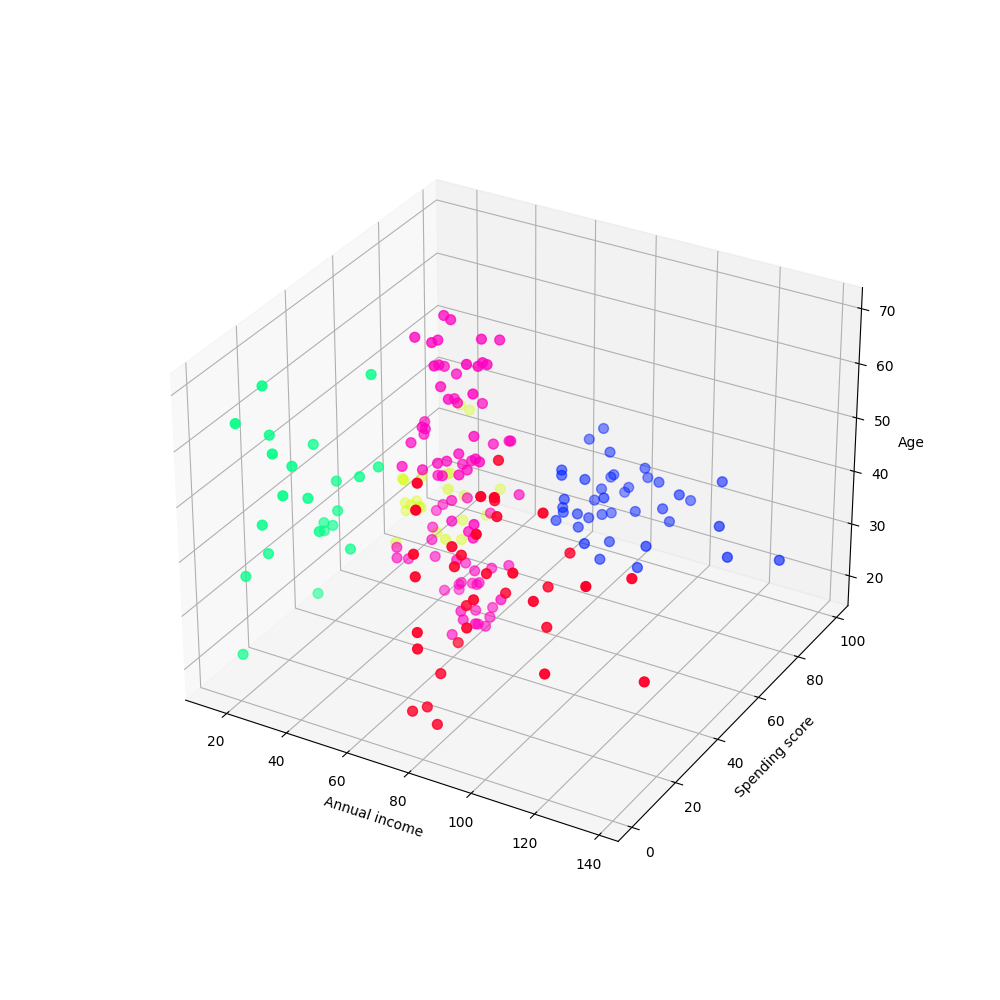

In [151]:
ks = 5
N_iterations = 10
DATA = Mall_small
CENT,CLF = Kmeans(DATA,ks,N_iterations)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter3D(DATA[:,0], DATA[:,1], data3.iloc[:,0].values, c=CLF, s=50, cmap='gist_rainbow_r')
ax.set_xlabel('Annual income')
ax.set_ylabel('Spending score')
ax.set_zlabel('Age')